In [1]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation

sw_eng = stopwords.words("english") + list(punctuation)
sw_indo = stopwords.words("indonesian") + list(punctuation)

# Import Data

In [2]:
df = pd.read_csv("data/kompas.csv")
df.head()

,teks
0,Ginandjar Tetap Ditahan. Jaksa Agung Dilaporka...
1,Jakarta Dikangkangi Para Preman\r\nKALAU tak p...
2,Penyimpangan di Setpres Seolah Terjadi Sekaran...
3,"Dibayarkan, Rapel Kenaikan Gaji Pegawai Pos\r\..."
4,"Stop Kekerasan, Elite agar Duduk Bersama\r\nSe..."


konsepnya adalah jd extrak dlu info dari textnya trus cari deh yg mirip sm hasil extraknya itu. trus bisa deh nemu dokumen apa yang mirip

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words=sw_indo, ngram_range=(1, 2), tokenizer=word_tokenize)
matrix = tfidf.fit_transform(df["teks"])

D:\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
D:\lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['``'] not in stop_words.
  warnings.warn(


# TF IDF SIM => DOC SIM

pake cosine similarity <br>
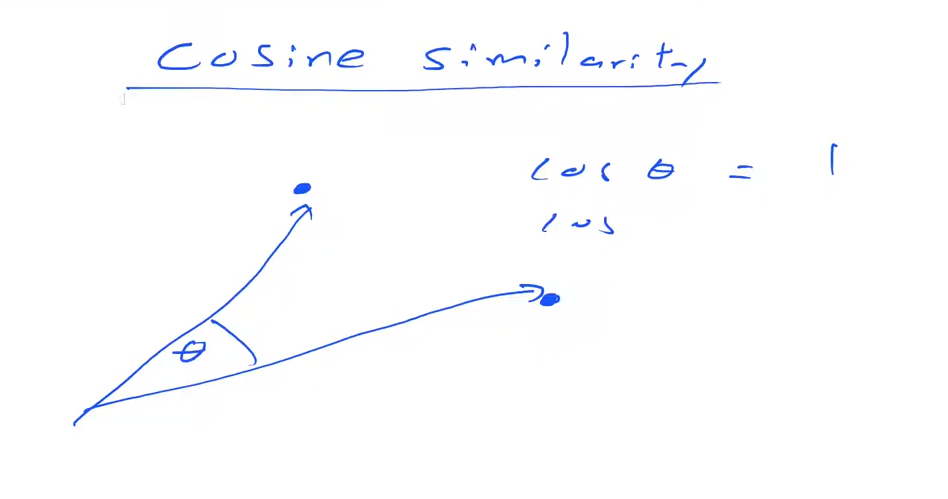

In [4]:
from sklearn.metrics.pairwise import cosine_similarity
cosim = cosine_similarity(matrix)

In [10]:
cosim[1].argsort()[-2] # index dari artikel yang paling mirip dengan artikel ke-1

172

In [14]:
df["teks"][1]

'Jakarta Dikangkangi Para Preman\r\nKALAU tak punya nyali dan uang cukup, jangan berjualan di sekitar Terminal Pulogadung Jakarta Timur. Belum lagi barang dagangan digelar, sudah harus membayar sewa lahan atau lapak seukuran 1 x 2 meter persegi seharga Rp 300.000. Ini belum termasuk "uang jago" dan uang kebersihan yang jumlahnya bisa mencapai Rp 7.000 sehari.   Jika tidak mematuhi aturan main yang berlaku, siap-siap saja barang dagangan diobrak-abrik preman berbadan kekar dan berwajah sangar. Masih lumayan jika cuma barang dagangan yang rusak. Sering terjadi, selain barang ludes, badan dan wajah babak belur dihajar preman.  Di Terminal Kampung Melayu, lain lagi ceritanya. Selain menjual lapak, para preman memungut "uang jalan" kepada setiap bus yang lewat. Pemungutan tidak langsung dilakukan preman, tetapi dilakukan kurir yang berpura-pura sebagai pedagang asongan, lalu memungut uang jalan dari kondektur bus Rp 1.000- Rp 2.000 sekali jalan.  Di Pasar Tanah Abang, kondisinya tidak jauh 

In [11]:
df["teks"][172] # artikel yang paling mirip dengan artikel ke-1

'Preman dari yang di Jalanan hingga yang Berdasi\r\nRENCANA Musyawarah Pimpinan Daerah (Muspida) DKI Jakarta untuk memerangi preman di Ibu Kota disambut dengan dingin oleh masyarakat. Warga umumnya merasa pernyataan itu cuma ungkapan politik belaka. Hal itu lebih karena ketidakkongkritan mereka untuk benar-benar memberantas kriminal dan menegakan hukum.  Di kalangan masyarakat yang memang bersentuhan dengan preman pun pernyataan perang itu mengundang pertanyaan. "Sebaiknya Gubernur DKI Jakarta Sutiyoso menjelaskan dulu, apa arti terminologi yang digunakannya untuk preman," kata Koesbanu yang pernah akrab dengan kehidupan jalanan dan kini Ketua Umum ATI (Asosiasi Tinju Indonesia) DKI Jakarta.  Dalam edaran lokasi rawan preman Pemda DKI disebutkan, mereka yang dikategorikan preman adalah tukang palak, judi, pemeras, mabuk, todong, parkir liar, calo, dan pelaku pencurian kendaraan bermotor. Premanisme lain yang disebutkan Pemda DKI adalah  timer  (calo), provokator, pemungut liar kaki lim

# Keywords Extraction

In [16]:
vocab = tfidf.get_feature_names_out() # vocabulary
vocab[0:10] # 10 kata pertama dari vocabulary

array(["''", "'' ''", "'' 'id", "'' -ada", "'' -bahasa", "'' -bahwa",
       "'' -dan", "'' -di", "'' -jatuh", "'' -kini"], dtype=object)

In [17]:
matrix[1].toarray()[0].argsort()[-10:] # index dari kata-kata yang paling penting dalam artikel ke-1

array([525934, 529477, 203390,   2707, 529322, 426081, 375801, 300075,
       375730, 427470], dtype=int64)

In [22]:
[vocab[index] for index in matrix[1].toarray()[0].argsort()[-10:]] # 10 kata yang paling penting dari artikel ke-1

['trunojoyo',
 'uang jalan',
 'jalan trunojoyo',
 "'' pedagang",
 'uang',
 'potmas',
 'pedagang kaki',
 'memberantas preman',
 'pedagang',
 'preman']

In [23]:
def extract_keywords_tfidf(doc, tfidf, topk=10):
    matrix = tfidf.transform([doc])
    vocab = tfidf.get_feature_names_out()
    keywords = [vocab[index] for index in matrix.toarray()[0].argsort()[-topk:]]
    return keywords

extract_keywords_tfidf(df["teks"][1], tfidf)

['trunojoyo',
 'uang jalan',
 'jalan trunojoyo',
 "'' pedagang",
 'uang',
 'potmas',
 'pedagang kaki',
 'memberantas preman',
 'pedagang',
 'preman']

In [25]:
text = """
Beragam reaksi muncul sejak dirilisnya teaser trailer dari One Piece Live Action. Manga shonen terkenal di Jepang itu diadaptasi oleh Netflix yang memiliki rekam jejak yang cukup meresahkan dalam adaptasi manga. 

Di Jepang, manga One Piece konsisten mencatat penjualan yang tinggi. Pada 2022, situs GameRant melaporkan 10,3 juta manga One Piece berhasil terjual.

Enam+02:56VIDEO: Presiden Vladimir Putin Tegaskan Rusia Telah Kirim Senjata Nuklir ke Belarus
One Piece adalah satu-satunya seri manga terkenal dari era 2000-an yang masih masuk 10. Manga Naruto dan Bleach sudah tamat, dan Hunter X Hunter masih hiatus. 

Akun Twitter One Piece Netflix merilis teaser trailer pada 18 Juni 2023. Hingga Senin (19/6/2023), video itu telah ditonton 28,7 juta kali dan di-retweet hingga 42 ribu kali. 

Ada yang merasa senang dengan adaptasi tersebut, ada yang sangsi, ada pula yang mengkritik. Penyebab kritikannya adalah karena "trauma" atas adaptasi live action sebelum-sebelumnya. 

Adaptasi Dragon Ball mengecewakan banyak fans. Netflix pun pernah mengadaptasi Death Note dan Cowboy Bebop, dan keduanya mencatat review yang cukup parah berdasarkan konsensus situs Rotten Tomatoes.

Berikut beragam reaksi netizen dari teaser trailer One Piece Live Action, mulai dari reaksi positif, negatif, dan abu-abu.
"""

extract_keywords_tfidf(text, tfidf)

['terkenal',
 'beragam',
 'situs',
 'reaksi',
 'hunter',
 'action',
 'trailer',
 'live',
 'adaptasi',
 'one']